In [2]:
import pandas as pd
print(pd.__version__)

2.2.3


In [8]:
import os
print(f"当前工作目录：{os.getcwd()}")

当前工作目录：/home/jovyan/10


In [12]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 196.1 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


### 1.Pandas数据读取常用的方法
1. read_csv( ):txt、csv文件（一般是以英文符号逗号"，"为数据分隔符）
2. read_excel( ) 有一定的数据量限制

In [16]:
#读取Excel()文件数据
df_excel = pd.read_excel('报表清单.xlsx')
df_excel.head(5)

,报名名称,用途,测试区路径,正式区路径,清洗工作流,范围,MES
0,SAP_Dailyreport.cpt,SAP类生产日报简洁,Copy_test/Manufacturing/SAP_Officia,SAP_Official,NaN,各园区,3.0
1,SAP_Dailyreport_Detail.cpt,SAP类生产日报详细,Copy_test/Manufacturing/SAP_Officia,SAP_Official,NaN,各园区,3.0
2,BA_SAP.cpt,SAP类BA结存报表,Copy_test/Manufacturing,/,NaN,各园区,3.0
3,dailyreport_detail.cpt,DM生产日报详细,Copy_test/Manufacturing/MES_ODS,MES_ODS,NaN,各园区,NaN
4,dailyreport.cpt,DM生产日报简洁,Copy_test/Manufacturing/MES_ODS,MES_ODS,NaN,各园区,NaN


In [17]:
#保存Excel文件数据
df_excel.to_excel('保存清单.xlsx' ,sheet_name='Sheet1')
#直接调用，如果文件已存在，则会覆盖原来的数据，重新写入数据
df_excel.to_excel('保存清单.xlsx' ,sheet_name='Sheet1')

In [18]:
#会话式保存多个sheet数据到同一个Excel文件里
with pd.ExcelWriter('多个sheet保存清单.xlsx') as writer:
    df_excel.to_excel(writer,sheet_name='sheet1')
    df_excel.to_excel(writer,sheet_name='sheet2')
    df_excel.to_excel(writer,sheet_name='sheet3')


In [45]:
#pd.ExcelFile方法，循坏读取Excel文件的多个sheet数据合并后保存到新的Excel中
df_excel = pd.ExcelFile(r'多个sheet保存清单.xlsx')
df = pd.DataFrame()
for name in df_excel.sheet_names:
    data = pd.ExcelFile.parse(df_excel,sheet_name=name)
    df = pd.concat([df,data])
df.to_excel('合并保存清单.xlsx')

In [52]:
#读取CSV文件
df_csv = pd.read_csv('工序1.csv')
print(df_csv)

            111               精磨
0          1112             1112
1       111TEST          111TEST
2             2                3
3          2222            11111
4           333              333
..          ...              ...
994  BA3AQC3.01  A3厂10号线FQC3非整理仓
995   BA3AR0.01         电膜AR非整理仓
996   BA3AR0.02          电膜AR整理仓
997   BA3AR0.03        AR整理仓（不良）
998   BA3AS0.01         电膜AS非整理仓

[999 rows x 2 columns]


In [55]:
#保存csv文件
df_csv.to_csv('工序2.csv')
#在同一个csv文件中追加保存数据
df_csv.to_csv('工序2.csv' , mode='a' , header=None) #mode='a'--追加  header=None--去除追加部分数据的表头

### read_csv()方法中常用的参数的使用方法

In [61]:
#header设置表头 ，
#name=[]重新设置表头，
#index_col设置索引，
#usecols 设置需要的字段 ，
#chunksize 设置按数量批次依次（next（reader））读取数据
#pd.concat() 合并数据
df_csv = pd.read_csv('工序1.csv' , header=0)
print(df_csv)

            111               精磨
0          1112             1112
1       111TEST          111TEST
2             2                3
3          2222            11111
4           333              333
..          ...              ...
994  BA3AQC3.01  A3厂10号线FQC3非整理仓
995   BA3AR0.01         电膜AR非整理仓
996   BA3AR0.02          电膜AR整理仓
997   BA3AR0.03        AR整理仓（不良）
998   BA3AS0.01         电膜AS非整理仓

[999 rows x 2 columns]


### pandas 查看和预览数据的方法

In [79]:
#设置界面显示的最大行列数据量
pd.options.display.max_columns = None
pd.options.display.max_rows= None
#读取数据
df = pd.read_csv('工序1.csv' )
#查看数据量、数据指标和数据维度
print(df.shape) #(999, 2) 999行，2列
#查看数据的尺寸大小
print(df.size) #1998 999*2
#查看前N条数据
print(df.head())#默认N是5
#查看后N条数据
print(df.tail())
#查看指定条件的数据
df[df['精磨']=='电膜AS非整理仓']
#查看指定列
df['精磨'].head() #或者df[['col1','col2']]查看多列
#查看指定行
df[20:31] #查看索引为20-30的行
#查看指定的行和列
df.loc[20:31, '精磨']
#按切片指定行和列
df.iloc[20:31 ,:5]
#查看指定行和列
df.iat[20,1]

(999, 2)
1998
       111       精磨
0     1112     1112
1  111TEST  111TEST
2        2        3
3     2222    11111
4      333      333
            111               精磨
994  BA3AQC3.01  A3厂10号线FQC3非整理仓
995   BA3AR0.01         电膜AR非整理仓
996   BA3AR0.02          电膜AR整理仓
997   BA3AR0.03        AR整理仓（不良）
998   BA3AS0.01         电膜AS非整理仓


'A1二次精雕'

,111,精磨
20,A1.2JD.01,A1二次精雕
21,A1.2JD.02,A1二次精雕
22,A1.2JM.01,A1二次精磨
23,A1.2JM.02,A1二次精磨
24,A1.2JM2.01,A1二次精磨(二部)
25,A1.2JM2.02,A1二次精磨(二部)
26,A1.2SY.01,A1二次丝印
27,A1.2SY.02,A1二次丝印
28,A1.2SYB.01,二次丝印B
29,A1.2SYB.02,二次丝印B


In [83]:
#查看数据详细嘻嘻和数据指标类型
print(df.dtypes)
#统计不同类型数据指标的数量
from collections import Counter
Counter(df.dtypes.values)
#查看数据详细信息、指标类型统计、数据大小、内存占用信息
df.info()


111    object
精磨     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   111     999 non-null    object
 1   精磨      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


,111,精磨
count,999,999
unique,999,931
top,BA3AS0.01,A1加硬
freq,1,6


### 数据统计分析一般方法

In [6]:
#用于生成 DataFrame 或 Series 的描述性统计信息 (主要是看数据分析初步形态)
df.describe()
df = pd.read_excel('score.xlsx')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学号      100 non-null    int64  
 1   性别      100 non-null    object 
 2   班级      99 non-null     float64
 3   语文      100 non-null    int64  
 4   数学      100 non-null    int64  
 5   英语      100 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.8+ KB


,学号,班级,语文,数学,英语
count,100.000000,99.000000,100.000000,100.000000,100.000000
mean,10050.500000,2.535354,68.760000,70.400000,68.240000
std,29.011492,1.033255,17.580476,17.627458,17.189449
min,10001.000000,1.000000,40.000000,40.000000,40.000000
25%,10025.750000,2.000000,50.750000,56.000000,54.750000
50%,10050.500000,3.000000,70.500000,72.500000,67.000000
75%,10075.250000,3.000000,82.250000,86.250000,83.500000
max,10100.000000,4.000000,99.000000,100.000000,100.000000


In [8]:
#查看每个类型数据的数量
df['性别'].value_counts()

性别
f    78
m    22
Name: count, dtype: int64

In [9]:
#查看每个类别数据的占比
df['性别'].value_counts(normalize=True)

性别
f    0.78
m    0.22
Name: proportion, dtype: float64

In [27]:
#对数值类型数据进行分箱处理
df_box = pd.cut(df['语文'] , bins = [40,60,80,100])
df_box.value_counts().sort_index()

语文
(40, 60]     33
(60, 80]     37
(80, 100]    29
Name: count, dtype: int64

### 数据可视化

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

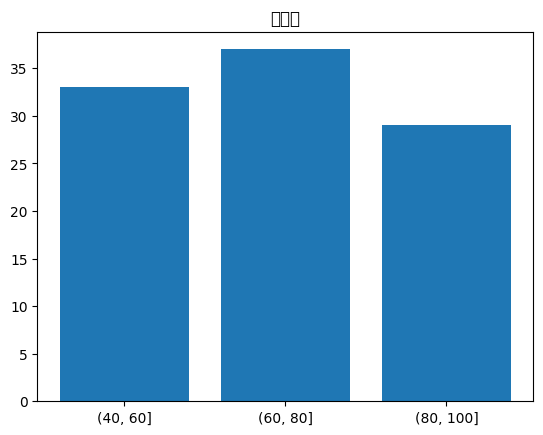

In [38]:
#画柱形图
import matplotlib.pyplot as plt
import matplotlib as mpl
#设置标题可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']= False
#range(3) 设置间距相等 #df_box.value_counts().sort_index() 数据量 #tick_label=df_box.value_counts().sort_index().index X轴标签
plt.bar(range(3),df_box.value_counts().sort_index(),tick_label=df_box.value_counts().sort_index().index)
plt.title('柱形图')
plt.show()

In [37]:
mpl.get_cachedir()

'/home/jovyan/.cache/matplotlib'

In [18]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 388.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 618.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 790.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 645.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 578.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 602.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 849.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_155/3055492163.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['语文'])
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35821 (\N{CJK UNIFIED IDEOGRAPH-8BED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


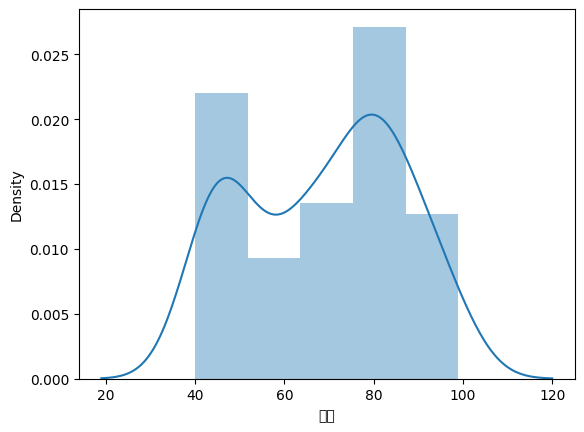

In [33]:
#密度分布直方图
import seaborn as sns
sns.distplot(df['语文'])
plt.show()

In [31]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 440.9 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib as mpl
mf_name = sorted([f.fname for f in mpl.font_manager.fontManager.ttflist])
print("字体数",len(mf_name))
for i in mf_name[0:10]:
    print(i)

字体数 54
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf
/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf


In [45]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_path = 'msyh.ttc'
file  = font_manager.findSystemFonts(fontpaths=  'msyh.ttc' )
print(file)
#font_manager.fontManager.addfont(file)

[]
